## Reading in the Datasets

In [1]:
# reading in articles.B2M.csv
import pandas as pd
from pathlib import Path

# adjust the path based on actual file location
articles = pd.read_csv('articles.B2M.csv')  

articles.head()

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10575721,[Computer-assisted preoperative planning of kn...,The general configuration of replaced knee is ...,0035-1040,Revue de chirurgie orthopedique et reparatrice...,(85) 591-600,1999,E,Nerkowski,E,"Equipe B2M, ENSAM, Aix-en-Provence."
1,10617805,[Urogenital amyloidosis: clinico-pathological ...,Amyloidosis of the genito-urinary tract is unc...,0242-6498,Annales de pathologie,(19) 487-91,1999,M,Esslimani,M,"Service d'Anatomie Pathologique, Hôpital Gui d..."
2,10656443,Serum beta-2 microglobulin levels are a signif...,Our objective was to investigate the prognosti...,1078-0432,Clinical cancer research : an official journal...,(6) 147-52,2000,J,Rodriguez,J,"Department of Leukemia, University of Texas M...."
3,10790290,Exposure of Daudi cells to low-frequency magne...,The effect of extremely low-frequency electrom...,0033-7587,Radiation research,(153) 663-9,2000,C A,Morehouse,CA,FDA Center for Devices and Radiological Health...
4,10793017,Effects of dialyzer reuse on the permeability ...,Little attention has been given to the effects...,1523-6838,American journal of kidney diseases : the offi...,(35) 839-44,2000,J P,Matos,JP,"Department of Internal Medicine, Division of N..."


In [2]:
# reading in authors.B2M.csv
authors = pd.read_csv('authors.B2M.csv')
authors.head()

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,10575721,1,E,Nerkowski,E,"Equipe B2M, ENSAM, Aix-en-Provence."
1,10575721,2,P,Calas,P,NaN
2,10575721,3,A,Mouttet,A,NaN
3,10617805,1,M,Esslimani,M,"Service d'Anatomie Pathologique, Hôpital Gui d..."
4,10617805,2,I,Serre,I,NaN


In [3]:
# reading in paper_counts.csv
paper_counts = pd.read_csv('paper_counts.csv')
paper_counts.head()

,Year,Count
0,1799,1
1,1801,1
2,1802,1
3,1805,1
4,1866,1


## Initial Data Analysis

In [4]:
# summary of columns in articles
articles.info()
# mostly non-null except for a few affiliations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PMID                    665 non-null    int64 
 1   Title                   665 non-null    object
 2   Abstract                665 non-null    object
 3   ISSN                    665 non-null    object
 4   Journal                 665 non-null    object
 5   Location                665 non-null    object
 6   Year                    665 non-null    int64 
 7   FirstAuthorForename     665 non-null    object
 8   FirstAuthorLastname     665 non-null    object
 9   FirstAuthorInitials     665 non-null    object
 10  FirstAuthorAffiliation  659 non-null    object
dtypes: int64(2), object(9)
memory usage: 57.3+ KB


In [5]:
authors.info()
# affiliations and a few initials are null - will need to drop these rows later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PMID               5797 non-null   int64 
 1   AuthorN            5797 non-null   int64 
 2   AuthorForename     5796 non-null   object
 3   AuthorLastname     5797 non-null   object
 4   AuthorInitials     5793 non-null   object
 5   AuthorAffiliation  4422 non-null   object
dtypes: int64(2), object(4)
memory usage: 271.9+ KB


In [6]:
paper_counts.info()
# all non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    143 non-null    int64
 1   Count   143 non-null    int64
dtypes: int64(2)
memory usage: 2.4 KB


In [7]:
# checking how many authors have only alphabetical characters in their first name column
alpha_first_names = authors['AuthorForename'].str.isalpha().sum()
print(f"Number of authors with only alphabetical characters in their first name: {alpha_first_names}")

# checking first name initials column
alpha_first_initials = authors['AuthorInitials'].str.isalpha().sum()
print(f"Number of authors with only alphabetical characters in their initials: {alpha_first_initials}")

Number of authors with only alphabetical characters in their first name: 3939
Number of authors with only alphabetical characters in their initials: 5790


The 'AuthorForename' column has multiple rows with input errors like @'s, $'s, £'s, etc. which are obviously not a part of anyone's first name. The first name initials column looks to be cleaner, although this introduces the issue of people who share first name initials and a last name.

## Most Active Researchers

Who appears the most in authors.csv?

In [8]:
# who appears most frequently as an author?
# will need to merge 'AuthorLastname' and 'AuthorInitials' columns to get full names
authors['FullName'] = authors['AuthorLastname'] + ', ' + authors['AuthorInitials']
author_totals = authors['FullName'].value_counts()

# using head() to see top 10 most frequent authors
author_totals.head(10)  

FullName
Wang, Y     17
Wang, X     16
Zhang, Y    13
Li, Y       13
Wang, J     12
Zhang, H    12
Wang, Z     10
Liu, Y       9
Li, L        9
Wang, Q      9
Name: count, dtype: int64

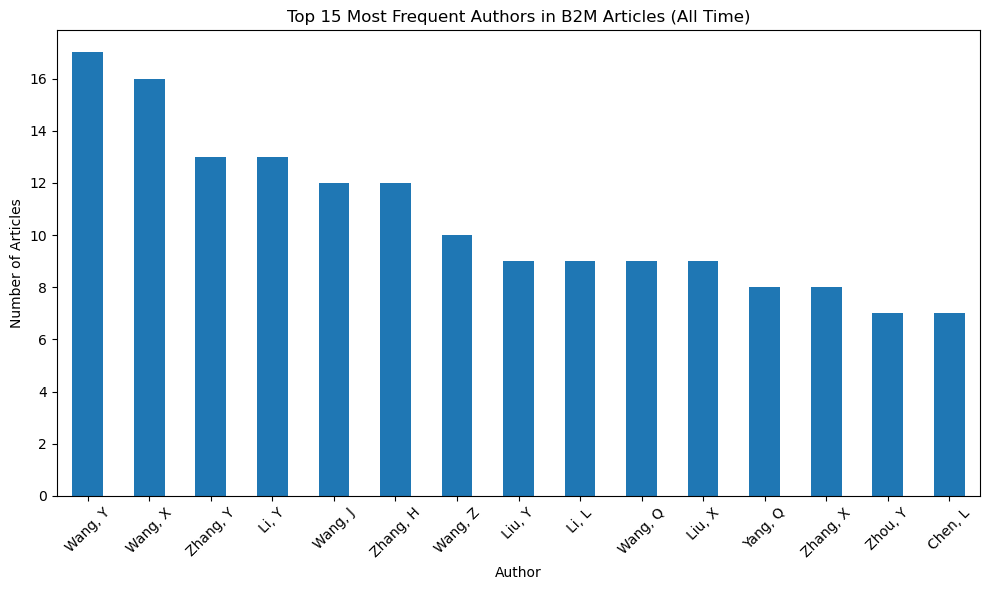

In [64]:
# plotting this data in a bar chart
import matplotlib.pyplot as plt
top_authors = author_totals.head(15)
top_authors.plot(kind='bar', figsize=(10,6))
plt.title('Top 15 Most Frequent Authors in B2M Articles (All Time)')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can compare this to how frequently each author appears since 2020 (regardless of authorship position).

'Year' is in 'articles.csv'.

In [10]:
# making a new dataframe with articles from 2020 onwards
recent_articles = articles[articles['Year'] >= 2020]
recent_articles.head()

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
415,30862937,Towards precision medicine for stress disorder...,The biological fingerprint of environmental ad...,1476-5578,Molecular psychiatry,(25) 918-938,2020,H,Le-Niculescu,H,"Department of Psychiatry, Indiana University S..."
436,31425267,"Removal of Urea, β2-Microglobulin, and Indoxyl...","In this study, simultaneous removal assessment...",1538-943X,ASAIO journal (American Society for Artificial...,(66) 698-705,2020,Kai,Lauri,K,"From the Department of Health Technologies, Ta..."
451,31729180,Knockout of beta-2 microglobulin reduces stem ...,Generating universal human umbilical mesenchym...,1582-4934,Journal of cellular and molecular medicine,(24) 695-710,2020,Yuqing,Zhang,Y,Institute for Cardiovascular Science & Departm...
452,31733031,"Triple (GGTA1, CMAH, B2M) modified pigs expres...",Porcine xenografts lacking swine leukocyte ant...,1600-6143,American journal of transplantation : official...,(20) 988-998,2020,Rabea,Hein,R,"Transplant Laboratory, Department of General-,..."
453,31782146,New prognosis score including absolute lymphoc...,The International Prognostic Index (IPI) is th...,1365-2141,British journal of haematology,(188) 888-897,2020,Leyre,Bento,L,"Hospital Universitario Son Espases, IdISBa, Pa..."


In [11]:
# making a new dataframe from authors where PMID is in recent_articles
recent_authors = authors[authors['PMID'].isin(recent_articles['PMID'])]
recent_authors.head()

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,FullName
3239,30862937,1,H,Le-Niculescu,H,"Department of Psychiatry, Indiana University S...","Le-Niculescu, H"
3240,30862937,2,K,Roseberry,K,"Department of Psychiatry, Indiana University S...","Roseberry, K"
3241,30862937,3,D F,Levey,DF,"Department of Psychiatry, Indiana University S...","Levey, DF"
3242,30862937,4,J,Rogers,J,"Department of Psychiatry, Indiana University S...","Rogers, J"
3243,30862937,5,K,Kosary,K,"Department of Psychiatry, Indiana University S...","Kosary, K"


In [65]:
# counting most frequent authors in recent_articles
recent_author_totals = recent_authors['FullName'].value_counts()
recent_author_totals.head(15)

FullName
Wang, X     9
Li, Y       8
Zhang, H    7
Wang, Z     7
Wang, J     7
Wang, Y     7
Li, L       6
Zhou, Y     6
Zhang, Y    6
Zhang, X    5
Liu, X      5
Liu, Y      5
Yang, J     5
Wang, Q     5
Zhao, Y     5
Name: count, dtype: int64

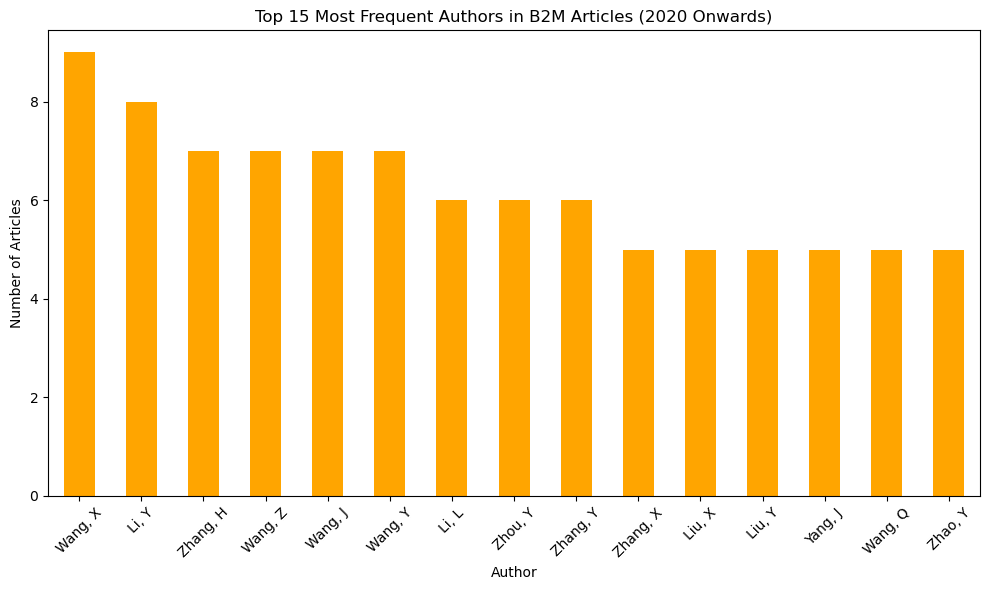

In [66]:
# plotting the top 10 recent authors
top_recent_authors = recent_author_totals.head(15)
top_recent_authors.plot(kind='bar', figsize=(10,6), color='orange')
plt.title('Top 15 Most Frequent Authors in B2M Articles (2020 Onwards)')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

With these two barcharts, we can see that some researchers have dominated research historically, having a high total number of B2M-related articles. However a partially different set of researchers have been most active in the field since 2020.

Using first name initials could slightly limit this insight, as some people may share a surname and first initial - two different people may have been rolled into one bar as the same person.

However, the first name initials column had fewer typos than the full first name column, so should generally be more reliable.

## Change in Influence

Given we are using number of articles as a proxy for influence and activity as a researcher of B2M, then change in the top 10 rankings should indicate a change in influence.

In [67]:
# collecting all author names in top_authors and top_recent_authors, and then creating a table with their 'all time' rank and 'recent' rank
all_top_authors = set(top_authors.index).union(set(top_recent_authors.index))

# creating an empty list to hold the ranking data
ranking_table = []

# looping through all unique authors to get their ranks
for author in all_top_authors:
    all_time_rank = top_authors.index.get_loc(author) + 1 if author in top_authors.index else None
    recent_rank = top_recent_authors.index.get_loc(author) + 1 if author in top_recent_authors.index else None
    ranking_table.append({
        'Author': author,
        'AllTimeRank': all_time_rank,
        'RecentRank': recent_rank
    })
    
# converting the ranking table to a DataFrame and sorting it
ranking_df = pd.DataFrame(ranking_table)
ranking_df = ranking_df.sort_values(by=['AllTimeRank', 'RecentRank'], na_position='last')
ranking_df

# adding change in rank to the dataframe
ranking_df['RankChange'] = ranking_df['AllTimeRank'] - ranking_df['RecentRank']
ranking_df

,Author,AllTimeRank,RecentRank,RankChange
6,"Wang, Y",1.0,6.0,-5.0
13,"Wang, X",2.0,1.0,1.0
12,"Zhang, Y",3.0,9.0,-6.0
15,"Li, Y",4.0,2.0,2.0
3,"Wang, J",5.0,5.0,0.0
2,"Zhang, H",6.0,3.0,3.0
11,"Wang, Z",7.0,4.0,3.0
10,"Liu, Y",8.0,12.0,-4.0
14,"Li, L",9.0,7.0,2.0
5,"Wang, Q",10.0,14.0,-4.0


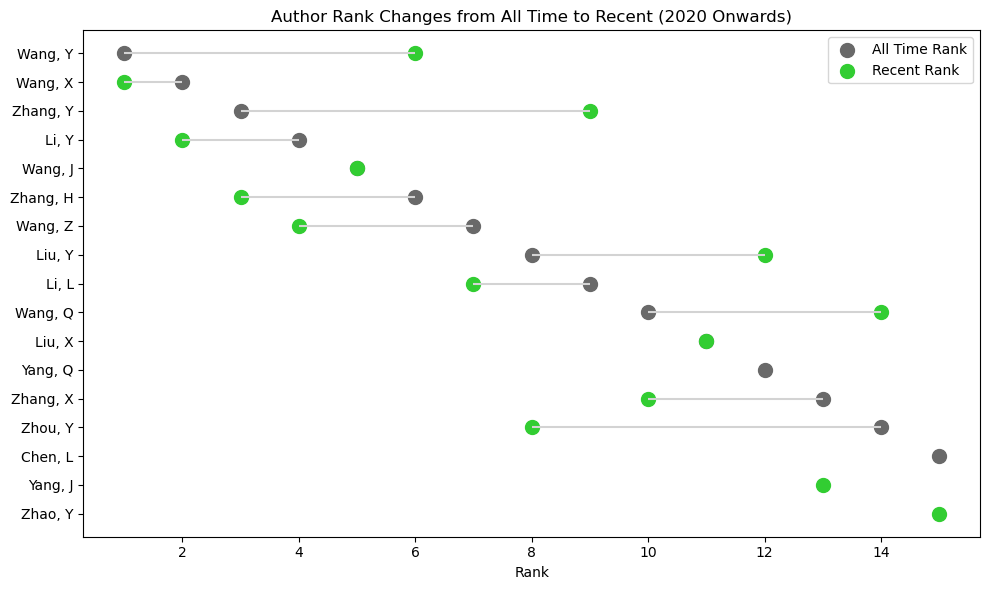

In [68]:
# creating a dumbbell plot to visualize rank changes
import numpy as np
fig, ax = plt.subplots(figsize=(10, 6))
y_positions = np.arange(len(ranking_df))
ax.hlines(y=y_positions, xmin=ranking_df['AllTimeRank'], xmax=ranking_df['RecentRank'], color='lightgray')
ax.scatter(ranking_df['AllTimeRank'], y_positions, color='dimgrey', label='All Time Rank', s=100)
ax.scatter(ranking_df['RecentRank'], y_positions, color='limegreen', label='Recent Rank', s=100)
ax.set_yticks(y_positions)
ax.set_yticklabels(ranking_df['Author'])
ax.invert_yaxis()
ax.set_xlabel('Rank')
ax.set_title('Author Rank Changes from All Time to Recent (2020 Onwards)')
ax.legend()
plt.tight_layout()
plt.show()

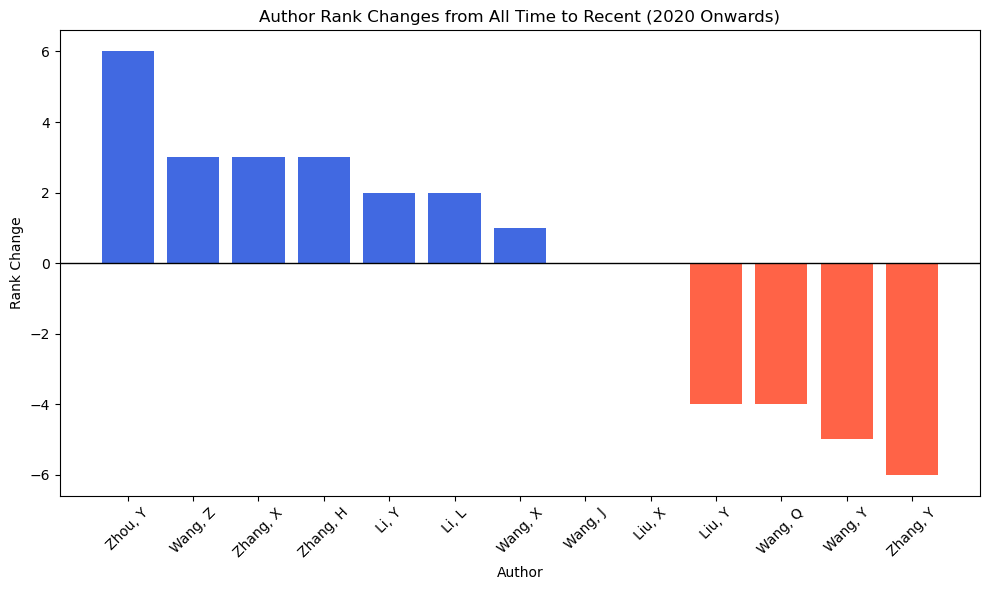

In [69]:
# creating a bar chart of rank changes - positive values are blue, negative values are red
# entrants and leavers of the top 10 will be ignored for this graph
ranking_df = ranking_df.dropna(subset=['RankChange'])
ranking_df = ranking_df.sort_values(by='RankChange', ascending=False)

plt.figure(figsize=(10,6))
colors = ['royalblue' if x > 0 else 'tomato' for x in ranking_df['RankChange']]
plt.bar(ranking_df['Author'], ranking_df['RankChange'], color=colors)
plt.axhline(y=0, color='black', linewidth=1)
plt.title('Author Rank Changes from All Time to Recent (2020 Onwards)')
plt.xlabel('Author')
plt.ylabel('Rank Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Shortlist

Using these analyses, we can reasonably shortlist 10 researchers. 9 of them have actively increased their B2M research since 2020, relative to others. And 1 is the original 'all time' top researcher, although they dropped off their research since 2020 and fell down the ranking.

In [70]:
# creating a new dataframe with only authors who improved or maintained their rank, and Wang Y
shortlisted_authors = ranking_df[(ranking_df['RankChange'] >= 0) | (ranking_df['Author'] == 'Wang, Y')]
shortlisted_authors

,Author,AllTimeRank,RecentRank,RankChange
9,"Zhou, Y",14.0,8.0,6.0
11,"Wang, Z",7.0,4.0,3.0
8,"Zhang, X",13.0,10.0,3.0
2,"Zhang, H",6.0,3.0,3.0
15,"Li, Y",4.0,2.0,2.0
14,"Li, L",9.0,7.0,2.0
13,"Wang, X",2.0,1.0,1.0
3,"Wang, J",5.0,5.0,0.0
4,"Liu, X",11.0,11.0,0.0
6,"Wang, Y",1.0,6.0,-5.0


We can now use PMID to see which papers all of these 7 authors worked on, and see if there is any overlap/collaboration.

## Collaboration Structure

In [71]:
# using shortlisted author names to filter to authors dataframe
# matching 'Author' in shortlisted_authors to 'FullName' in authors to get their affiliations
author_pmids = authors[authors['FullName'].isin(shortlisted_authors['Author'])]
author_pmids

# now we have the PMIDs and affiliations for these authors

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,FullName
112,12464555,1,H,Zhang,H,"Institute of Medical Science, University of To...","Zhang, H"
171,15259364,7,Yuanfen,Zhou,Y,NaN,"Zhou, Y"
492,18692183,6,Zaijuan,Wang,Z,NaN,"Wang, Z"
661,20036209,2,Junping,Wang,J,NaN,"Wang, J"
709,20599650,2,Yang,Li,Y,NaN,"Li, Y"
...,...,...,...,...,...,...,...
5641,37526345,19,Xu,Zhang,X,"Department of Urology, the Third Medical Cente...","Zhang, X"
5643,37526345,21,Zhihua,Wang,Z,"Department of Urology, Tongji Hospital, Tongji...","Wang, Z"
5648,37550685,1,Xianming,Wang,X,"Department of Orthopedic Surgery, The Second A...","Wang, X"
5763,37972698,2,Yumei,Zhou,Y,"College of Animal Science and Technology, Sout...","Zhou, Y"


Now we have each PMID from each shortlisted author, we can see how many times PMIDs are shared between each author - ie how many articles they collaborated on.

In [72]:
# counting author-author full name pairs for each PMID in author_pmids
# counting how many different authors are on each PMID
pmid_counts = author_pmids.groupby('PMID')['FullName'].nunique()
shared_pmids = pmid_counts[pmid_counts > 1]

print(f"Total PMIDs: {len(author_pmids['PMID'].unique())}")
print(f"Shared PMIDs (2+ authors): {len(shared_pmids)}")
print("\nShared PMIDs and author counts:")
print(shared_pmids.sort_values(ascending=False))

# for each PMID with multiple authors, show the authors
for pmid in shared_pmids.index:
    authors_on_pmid = author_pmids[author_pmids['PMID'] == pmid]['FullName'].unique()
    print(f"PMID {pmid}: {', '.join(authors_on_pmid)}")

from itertools import combinations

# creating an empty list to hold the author combinations
collaborations = []

# for each PMID with multiple authors, printing the PMID and the authors
for pmid in author_pmids['PMID'].unique():
    author_list = author_pmids[author_pmids['PMID'] == pmid]['FullName'].unique()
    if len(author_list) > 1:
        for author1, author2 in combinations(sorted(author_list), 2):
            collaborations.append({'Author1': author1, 'Author2': author2, 'PMID': pmid})

collab_df = pd.DataFrame(collaborations)
print(collab_df['Author1'].value_counts())  

Total PMIDs: 71
Shared PMIDs (2+ authors): 20

Shared PMIDs and author counts:
PMID
35368100    6
36868208    4
33658560    4
36055572    4
37526345    4
29979645    3
31423206    3
21925148    3
35841593    3
29615660    2
25049976    2
28182746    2
35343934    2
34323289    2
34305082    2
32746912    2
31729180    2
36016774    2
36691086    2
36460227    2
Name: FullName, dtype: int64
PMID 21925148: Liu, X, Zhang, X, Li, L
PMID 25049976: Wang, J, Wang, Y
PMID 28182746: Zhang, X, Liu, X
PMID 29615660: Wang, J, Zhang, X
PMID 29979645: Wang, Z, Wang, Y, Li, Y
PMID 31423206: Zhang, H, Li, L, Wang, X
PMID 31729180: Wang, Y, Li, Y
PMID 32746912: Wang, X, Li, Y
PMID 33658560: Zhang, H, Zhou, Y, Wang, X, Wang, Z
PMID 34305082: Zhou, Y, Zhang, H
PMID 34323289: Wang, J, Wang, Y
PMID 35343934: Li, Y, Zhang, X
PMID 35368100: Wang, Y, Wang, J, Liu, X, Li, L, Wang, X, Zhang, H
PMID 35841593: Li, L, Li, Y, Wang, X
PMID 36016774: Wang, J, Li, Y
PMID 36055572: Wang, X, Liu, X, Li, L, Zhang, H
PMID

In [73]:
# aggregating author pairs - counting how many PMIDs each pair collaborated on
author_pair_collabs = collab_df.groupby(['Author1', 'Author2']).size().reset_index(name='CollaborationCount')
author_pair_collabs = author_pair_collabs.sort_values('CollaborationCount', ascending=False)

print("Author Pairs and Collaboration Counts:")
print(author_pair_collabs)


Author Pairs and Collaboration Counts:
     Author1   Author2  CollaborationCount
24   Wang, X  Zhang, H                   5
3      Li, L   Wang, X                   4
6      Li, L  Zhang, H                   3
1      Li, L    Liu, X                   3
34  Zhang, H   Zhou, Y                   3
19   Wang, J   Wang, Y                   3
27   Wang, Y   Wang, Z                   3
16    Liu, X  Zhang, H                   2
17    Liu, X  Zhang, X                   2
10     Li, Y   Wang, Y                   2
7      Li, L  Zhang, X                   2
4      Li, L   Wang, Y                   2
26   Wang, X   Zhou, Y                   2
9      Li, Y   Wang, X                   2
14    Liu, X   Wang, X                   2
35  Zhang, X   Zhou, Y                   2
2      Li, L   Wang, J                   1
0      Li, L     Li, Y                   1
5      Li, L   Wang, Z                   1
11     Li, Y   Wang, Z                   1
18   Wang, J   Wang, X                   1
12     Li, Y  Z

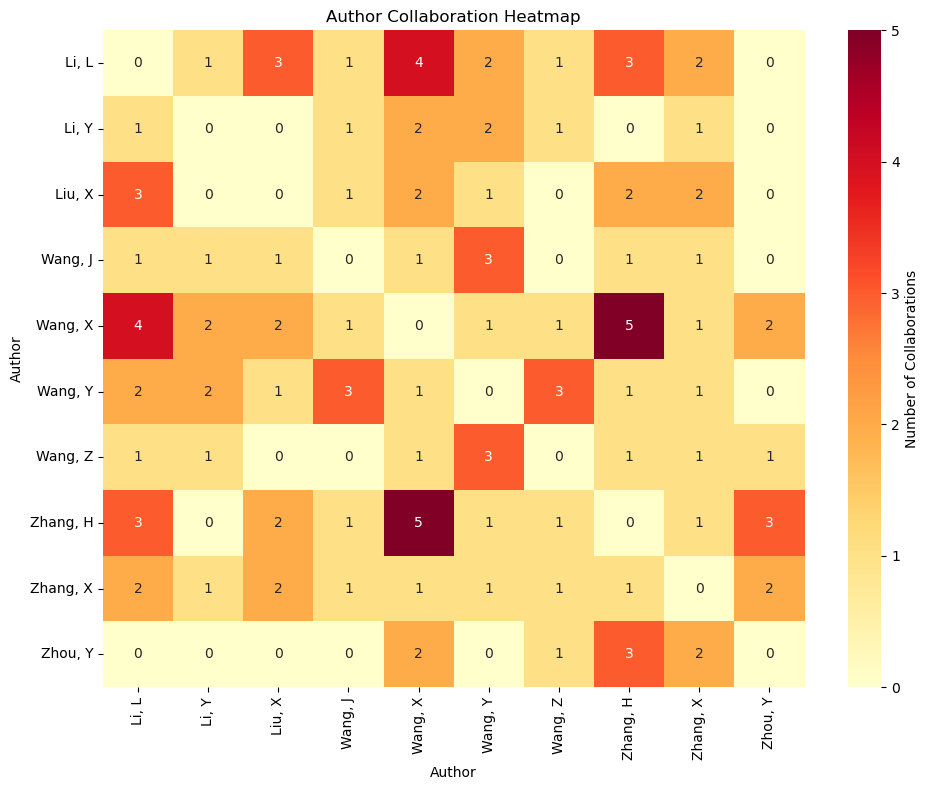

In [74]:
# creating a heatmap of author collaborations
import seaborn as sns

# creating a pivot table for the heatmap
# need to make it symmetric so both (A,B) and (B,A) appear
collab_matrix = author_pair_collabs.copy()
collab_matrix_reversed = author_pair_collabs.copy()
collab_matrix_reversed['Author1'], collab_matrix_reversed['Author2'] = collab_matrix_reversed['Author2'], collab_matrix_reversed['Author1']

# combining both directions
collab_matrix_full = pd.concat([collab_matrix, collab_matrix_reversed], ignore_index=True)

# pivoting to create matrix
pivot_table = collab_matrix_full.pivot_table(index='Author1', columns='Author2', values='CollaborationCount', fill_value=0)

# plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlOrRd', cbar_kws={'label': 'Number of Collaborations'})
plt.title('Author Collaboration Heatmap')
plt.xlabel('Author')
plt.ylabel('Author')
plt.tight_layout()
plt.show()


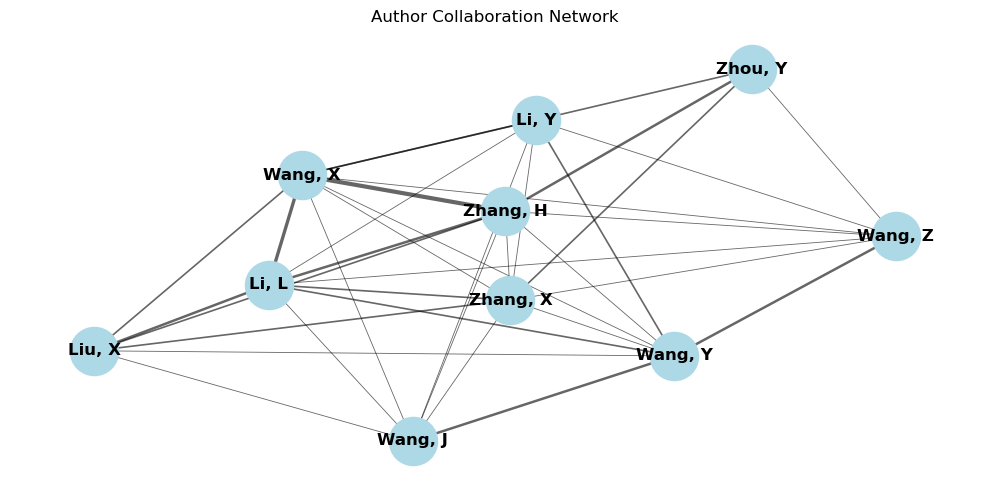

In [75]:
# creating a network graph of author collaborations
import networkx as nx

# creating graph from collaboration data
G = nx.Graph()

# adding edges with weights (collaboration counts)
for _, row in author_pair_collabs.iterrows():
    G.add_edge(row['Author1'], row['Author2'], weight=row['CollaborationCount'])

# creating figure
plt.figure(figsize=(10, 5))

# using spring layout for better visualization
pos = nx.spring_layout(G, k=2, iterations=50)

# drawing nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1200)

# drawing edges with thickness based on collaboration count
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
max_weight = max(weights)
edge_widths = [3 * (w / max_weight) for w in weights]

nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6)

# drawing labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

plt.title('Author Collaboration Network')
plt.axis('off')
plt.tight_layout()
plt.show()

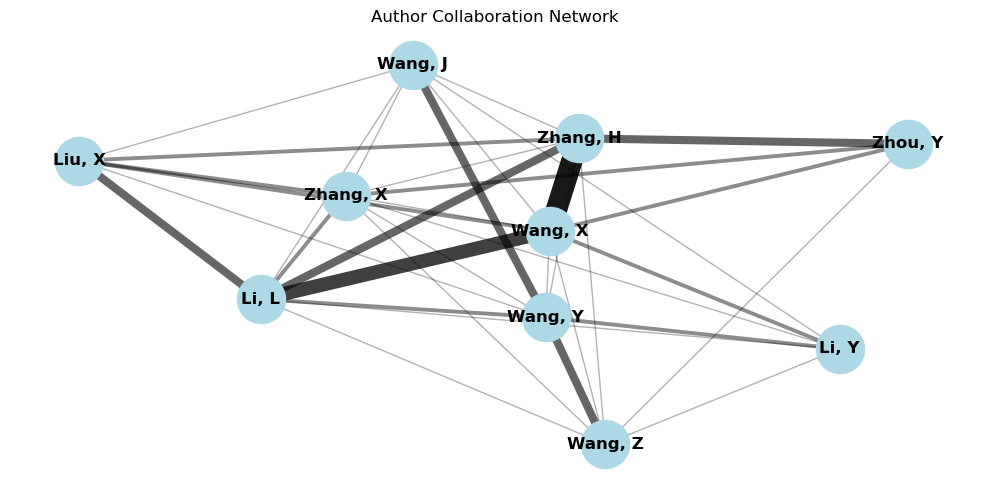

In [76]:
# creating a network graph of author collaborations
import networkx as nx
import matplotlib.pyplot as plt

# creating a blank graph
g = nx.Graph()

# looping through the dataframe and adding edges/lines between authors
# weights are collaboration counts - they will be thicker with more collaborations
for name, row in author_pair_collabs.iterrows():
    g.add_edge(row['Author1'], row['Author2'], weight=row['CollaborationCount'])

plt.figure(figsize=(10, 5))

pos = nx.spring_layout(g, k=2, iterations=50, seed=42)
# drawing nodes
nx.draw_networkx_nodes(g, pos, node_color='lightblue', node_size=1200)

# making weak ties weaker and strong ties stronger
edges = list(g.edges())
weights = [g[u][v]['weight'] for u, v in edges]

# non-linear scaling: squares the weight effect 
edge_widths = [0.4 + 0.6*(w**2) for w in weights]  

# also fading weak ties 
edge_alphas = [0.15 + 0.15*w for w in weights]      

# drawing edges one-by-one so each edge gets its own alpha
for (u, v), width, a in zip(edges, edge_widths, edge_alphas):
    nx.draw_networkx_edges(g, pos, edgelist=[(u, v)], width=width, alpha=a)

# labels
nx.draw_networkx_labels(g, pos, font_size=12, font_weight='bold')
plt.title('Author Collaboration Network')
plt.axis('off')
plt.tight_layout()
plt.show()

## Collaboration Intensity over Time

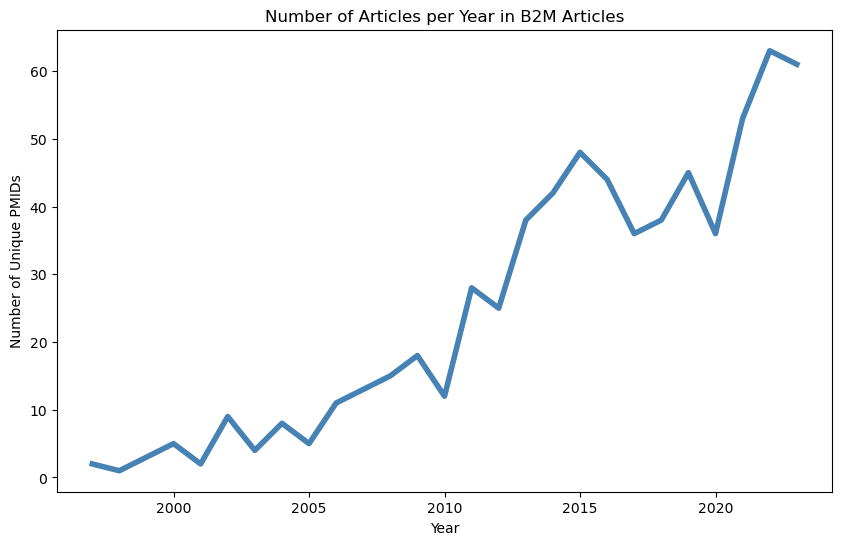

In [77]:
# using articles.B2M.csv, plotting number of PMIDs per year
pmid_counts_per_year = articles.groupby('Year')['PMID'].nunique()
pmid_counts_per_year.plot(kind='line', figsize=(10,6), color='steelblue', linewidth=4)
plt.title('Number of Articles per Year in B2M Articles')
plt.xlabel('Year')
plt.ylabel('Number of Unique PMIDs')
plt.show()

In [78]:
# getting the number of authors per paper in authors.B2M.csv
author_counts_per_pmid = authors.groupby('PMID')['FullName'].nunique()
author_counts_per_pmid.head()

PMID
10575721    3
10617805    6
10656443    7
10790290    2
10793017    5
Name: FullName, dtype: int64

In [79]:
# attaching year of article to author_counts_per_pmid
author_counts_with_year = author_counts_per_pmid.reset_index().merge(articles[['PMID', 'Year']], on='PMID', how='left')
author_counts_with_year.head(10)

,PMID,FullName,Year
0,10575721,3,1999
1,10617805,6,1999
2,10656443,7,2000
3,10790290,2,2000
4,10793017,5,2000
5,10848778,8,2000
6,10879242,4,1997
7,10951865,6,1999
8,11148456,1,2001
9,11261557,3,2001


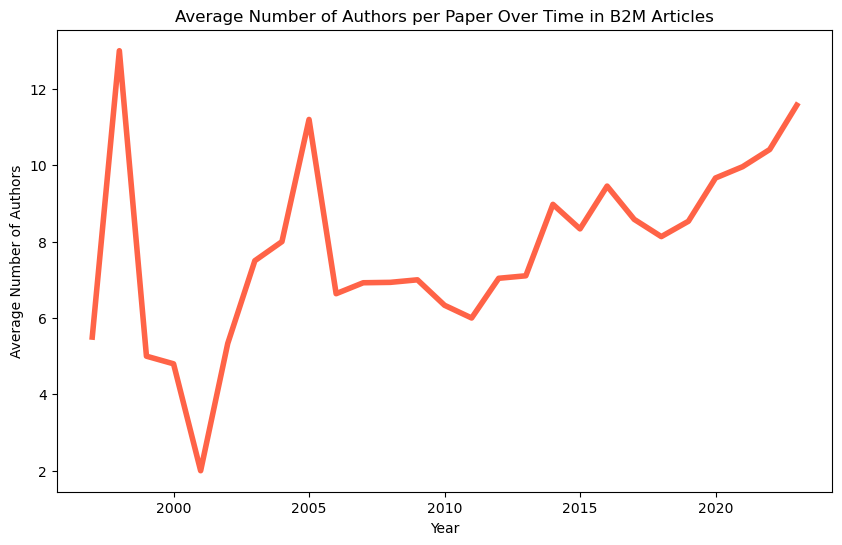

In [80]:
# plotting average number of authors per paper over time
avg_authors_per_year = author_counts_with_year.groupby('Year')['FullName'].mean()
avg_authors_per_year.plot(kind='line', figsize=(10,6), color='tomato', linewidth=4)
plt.title('Average Number of Authors per Paper Over Time in B2M Articles')
plt.xlabel('Year')
plt.ylabel('Average Number of Authors')
plt.show()

In [81]:
# printing people in authors.b2m.csv who have first initial 'X' and last name 'Wang'
wang_x_authors = authors[(authors['AuthorLastname'] == 'Wang') & (authors['AuthorInitials'] == 'X')]
wang_x_authors

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,FullName
1261,23811755,2,Xiang,Wang,X,NaN,"Wang, X"
1500,24626784,8,Xiao,Wang,X,Shanghai Institute of Endocrine and Metabolic ...,"Wang, X"
2138,26588193,4,Xuemei,Wang,X,"Department of Biostatistics, The University of...","Wang, X"
2345,27323194,2,X,Wang,X,"Department of Foreign Language, Foreign Lingui...","Wang, X"
3314,31125139,3,Xiaoyu,Wang,X,"Department of Laboratory Medicine, Fuwai Centr...","Wang, X"
3394,31423206,11,Xi,Wang,X,"Department of Cell Biology, College of Basic M...","Wang, X"
3396,31423206,13,Xianhuo,Wang,X,"Department of Lymphoma, Sino-US Center for Lym...","Wang, X"
3864,32746912,1,Xiaokai,Wang,X,"Department of Physiology and Pathophysiology, ...","Wang, X"
4039,33658560,4,Xinxing,Wang,X,"Department of Orthopedics, The Third Xiangya H...","Wang, X"
4543,34975342,2,Xiaoyan,Wang,X,"Center of Reproduction, Development & Aging, a...","Wang, X"


## Expanded Network Graph

Will go back to the 'top 10' rankings table from before and after 2020.

Will follow the same steps as before but using this expanded list of authors.

In [83]:
# creating a dataframe with the 12 ranked authors identified
seventeen_authors = pd.DataFrame(ranking_table)
seventeen_authors

,Author,AllTimeRank,RecentRank
0,"Yang, J",NaN,13.0
1,"Chen, L",15.0,NaN
2,"Zhang, H",6.0,3.0
3,"Wang, J",5.0,5.0
4,"Liu, X",11.0,11.0
5,"Wang, Q",10.0,14.0
6,"Wang, Y",1.0,6.0
7,"Yang, Q",12.0,NaN
8,"Zhang, X",13.0,10.0
9,"Zhou, Y",14.0,8.0


In [84]:
# using top 17 author names to filter to authors dataframe
# matching 'Author' in seventeen_authors to 'FullName' in authors to get their affiliations
top_seventeenauthor_pmids = authors[authors['FullName'].isin(seventeen_authors['Author'])]
top_seventeenauthor_pmids

# now we have the PMIDs and affiliations for these authors

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,FullName
112,12464555,1,H,Zhang,H,"Institute of Medical Science, University of To...","Zhang, H"
171,15259364,7,Yuanfen,Zhou,Y,NaN,"Zhou, Y"
492,18692183,6,Zaijuan,Wang,Z,NaN,"Wang, Z"
541,19012427,2,Yan,Zhang,Y,NaN,"Zhang, Y"
661,20036209,2,Junping,Wang,J,NaN,"Wang, J"
...,...,...,...,...,...,...,...
5656,37550685,9,Qing,Wang,Q,"Department of Orthopedic Surgery, The Second A...","Wang, Q"
5713,37838728,1,Yan,Zhang,Y,"Department of Anesthesiology, The Second Affil...","Zhang, Y"
5763,37972698,2,Yumei,Zhou,Y,"College of Animal Science and Technology, Sout...","Zhou, Y"
5765,37972698,4,Yongju,Zhao,Y,"College of Animal Science and Technology, Sout...","Zhao, Y"


In [85]:
# counting author-author full name pairs for each PMID in seventeen_author_pmids
# counting how many different authors are on each PMID
seventeen_pmid_counts = top_seventeenauthor_pmids.groupby('PMID')['FullName'].nunique()
seventeen_shared_pmids = seventeen_pmid_counts[seventeen_pmid_counts > 1]

print(f"Total PMIDs: {len(top_seventeenauthor_pmids['PMID'].unique())}")
print(f"Shared PMIDs (2+ authors): {len(seventeen_shared_pmids)}")
print("\nShared PMIDs and author counts:")
print(seventeen_shared_pmids.sort_values(ascending=False))

# for each PMID with multiple authors, show the authors
for pmid in seventeen_shared_pmids.index:
    authors_on_pmid = top_seventeenauthor_pmids[top_seventeenauthor_pmids['PMID'] == pmid]['FullName'].unique()
    print(f"PMID {pmid}: {', '.join(authors_on_pmid)}")

from itertools import combinations

# creating an empty list to hold the author combinations
collaborations = []

# for each PMID with multiple authors, printing the PMID and the authors
for pmid in top_seventeenauthor_pmids['PMID'].unique():
    author_list = top_seventeenauthor_pmids[top_seventeenauthor_pmids['PMID'] == pmid]['FullName'].unique()
    if len(author_list) > 1:
        for author1, author2 in combinations(sorted(author_list), 2):
            collaborations.append({'Author1': author1, 'Author2': author2, 'PMID': pmid})

seventeen_collab_df = pd.DataFrame(collaborations)
print(seventeen_collab_df['Author1'].value_counts())     

Total PMIDs: 100
Shared PMIDs (2+ authors): 40

Shared PMIDs and author counts:
PMID
35368100    6
35841593    5
36868208    5
33658560    4
37526345    4
36055572    4
21925148    3
24626784    3
36275473    3
37550685    3
31729180    3
31423206    3
29979645    3
23601718    2
24457517    2
25049976    2
25936423    2
25573171    2
25369870    2
29691200    2
29615660    2
28182746    2
26459413    2
26393896    2
34305082    2
34242779    2
33892543    2
33231514    2
32746912    2
32930470    2
31918111    2
34323289    2
36016774    2
35573408    2
34485161    2
35343934    2
36691086    2
36606194    2
36460227    2
37972698    2
Name: FullName, dtype: int64
PMID 21925148: Liu, X, Zhang, X, Li, L
PMID 23601718: Zhang, H, Chen, L
PMID 24457517: Zhang, Y, Wang, Q
PMID 24626784: Zhang, Y, Liu, Y, Wang, X
PMID 25049976: Wang, J, Wang, Y
PMID 25369870: Yang, Q, Wang, Y
PMID 25573171: Yang, Q, Li, Y
PMID 25936423: Zhang, Y, Yang, Q
PMID 26393896: Liu, Y, Zhang, Y
PMID 26459413: Yang, 

In [86]:
# aggregating author pairs - counting how many PMIDs each pair collaborated on
seventeen_author_pair_collabs = seventeen_collab_df.groupby(['Author1', 'Author2']).size().reset_index(name='CollaborationCount')
seventeen_author_pair_collabs = seventeen_author_pair_collabs.sort_values('CollaborationCount', ascending=False)

print("Author Pairs and Collaboration Counts:")
seventeen_author_pair_collabs

Author Pairs and Collaboration Counts:


,Author1,Author2,CollaborationCount
50,"Wang, X","Zhang, H",5
10,"Li, L","Wang, X",4
7,"Li, L","Liu, X",3
14,"Li, L","Zhang, H",3
66,"Zhang, H","Zhou, Y",3
...,...,...,...
62,"Wang, Z","Zhou, Y",1
65,"Zhang, H","Zhao, Y",1
64,"Zhang, H","Zhang, X",1
63,"Yang, Q","Zhang, Y",1


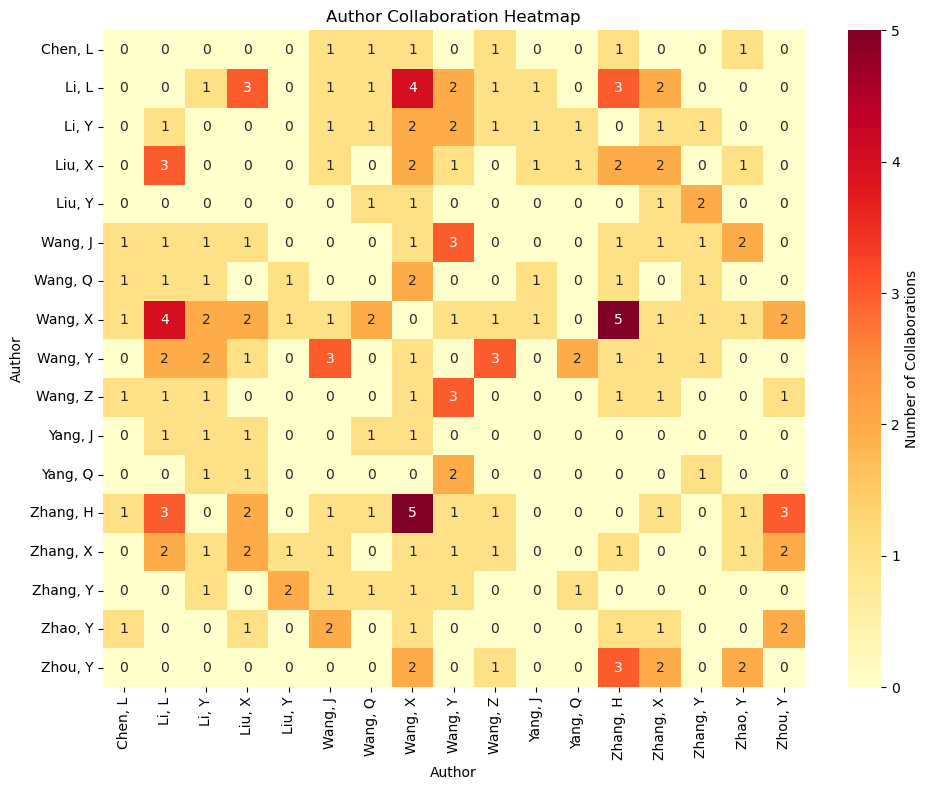

In [87]:
# creating a heatmap of author collaborations
import seaborn as sns

# creating a pivot table for the heatmap
# need to make it symmetric so both (A,B) and (B,A) appear
seventeen_collab_matrix = seventeen_author_pair_collabs.copy()
seventeen_collab_matrix_reversed = seventeen_author_pair_collabs.copy()
seventeen_collab_matrix_reversed['Author1'], seventeen_collab_matrix_reversed['Author2'] = seventeen_collab_matrix_reversed['Author2'], seventeen_collab_matrix_reversed['Author1']

# combining both directions
seventeen_collab_matrix_full = pd.concat([seventeen_collab_matrix, seventeen_collab_matrix_reversed], ignore_index=True)

# pivoting to create matrix
pivot_table = seventeen_collab_matrix_full.pivot_table(index='Author1', columns='Author2', values='CollaborationCount', fill_value=0)

# plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlOrRd', cbar_kws={'label': 'Number of Collaborations'})
plt.title('Author Collaboration Heatmap')
plt.xlabel('Author')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

Now we can make the expanded network graph

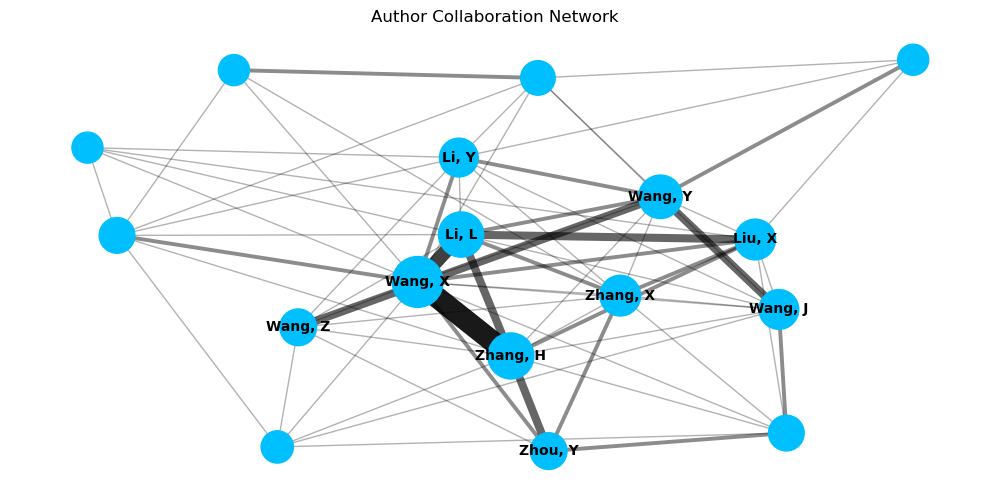

In [93]:
# creating a network graph of author collaborations
import networkx as nx
import matplotlib.pyplot as plt

# creating a blank graph
g = nx.Graph()

# looping through the dataframe and adding edges/lines between authors
# weights are collaboration counts - they will be thicker with more collaborations
for name, row in seventeen_author_pair_collabs.iterrows():
    g.add_edge(row['Author1'], row['Author2'], weight=row['CollaborationCount'])

plt.figure(figsize=(10, 5))

# calculate collaboration volume per author (weighted degree)
strength = dict(g.degree(weight='weight'))
max_strength = max(strength.values())

# initialize positions: high-volume authors start near center
import math
import random

# setting seed for a reproducible layout that wont change each run
random.seed(42)  

# strength is collaboration count - higher strength means closer to center
pos_init = {}
for node in g.nodes():
    radius = 1.5 * (1 - strength[node] / max_strength)
    theta = random.random() * 2 * math.pi
    pos_init[node] = (radius * math.cos(theta), radius * math.sin(theta))

# spring layout with weights: strong collaborations pull nodes together
# higher-weight edges act as stronger springs, pulling well-connected nodes together
pos = nx.spring_layout(g, pos=pos_init, k=2, iterations=50, seed=42, weight='weight')

# scale node size by collaboration volume
node_sizes = [300 + 40 * strength[node] for node in g.nodes()]
nx.draw_networkx_nodes(g, pos, node_color='deepskyblue', node_size=node_sizes)

# making weak ties weaker and strong ties stronger
edges = list(g.edges())
weights = [g[u][v]['weight'] for u, v in edges]

# non-linear scaling: squares the weight effect 
edge_widths = [0.4 + 0.6*(w**2) for w in weights]  

# also fading weak ties 
edge_alphas = [0.15 + 0.15*w for w in weights]      

# drawing edges one-by-one so each edge gets its own alpha
for (u, v), width, a in zip(edges, edge_widths, edge_alphas):
    nx.draw_networkx_edges(g, pos, edgelist=[(u, v)], width=width, alpha=a)

# labels - only show labels for shortlisted authors
shortlisted_names = set(shortlisted_authors['Author'])
labels_to_show = {node: node for node in g.nodes() if node in shortlisted_names}
nx.draw_networkx_labels(g, pos, labels=labels_to_show, font_size=10, font_weight='bold')

plt.title('Author Collaboration Network')
plt.axis('off')
plt.tight_layout()
plt.show()

This network graph uses the top 15 authors from the whole data and post-2020 with our top 7 labelled.

Larger nodes indicate a higher number of collaborations, and edge/line width increase with collaborations between an author pair. So, for example, X Wang and H Zhang clearly have the highest number of collaborations. 

Nodes with higher collaborations will initially start closer to the centre.

The spring_layout function allows stronger ties to have more 'pull', so those with more balanced/varied collaboration will end up near the centre.